# <span style='color:#2916F5'> Importaing Libraries </span>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
colt="#7D0552"
bicols=["#DC143C","#006400"]
import seaborn as sns
import plotly.express as px


from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import LinearSVC   
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn
import pickle

ModuleNotFoundError: No module named 'plotly'

# <span style='color:#2916F5'> Data Reading </span>

## <span style='color:#2916F5'>Loading Data </span>

In [2]:
def readdata():
    data=pd.read_csv("diabetes.csv")
    return data

## <span style='color:#2916F5'>Data Information</span>

In [3]:
def datainfo(data):
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("                  Data Information:\n")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(data.info())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("                  Missing Values in Data:\n")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(data.isna().sum())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

## <span style='color:#2916F5'>Target label Formatting</span>

In [4]:
def tarformat(data):
    data.Outcome=data.Outcome.replace(data.Outcome.unique(),["Diabetic","Healthy"])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("   Count of Data Lables")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(data.Outcome.value_counts())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    plt.figure(figsize=(6,3))
    plt.title("Visualization of Label Counts",color="b")
    sns.countplot(data.Outcome,palette="PuOr")
    plt.grid()
    plt.show()
    return data

## <span style='color:#2916F5'>Data Visualization</span>

In [5]:
def chartcreator(df,ft1,ft2,vztyp):
    pd.crosstab(df[ft1],df[ft2]).plot(kind=vztyp,figsize=(6,4),color=bicols)
    plt.title('Diabetes by {}'.format(ft1), fontsize=15,color=colt)
    plt.xlabel('{}'.format(ft1), fontsize=12,color=colt)
    plt.ylabel('Count', fontsize=12,color=colt)
    plt.grid()
    plt.show()
def barchart(df1,df2,ft1):
    meanval1=df1[ft1].mean()
    meanval2=df2[ft1].mean()
    cat=["Diabetic","Healthy"]
    val=[meanval1,meanval2]
    plt.figure(figsize=(6,4))
    plt.title("Average {} of Diabetic and Healthy Person".format(ft1),fontsize=18,color=colt)
    plt.xlabel("Type",fontsize=18,color=colt)
    plt.ylabel("Agerage {}".format(ft1),fontsize=18,color=colt)
    plt.barh(cat,val,color=bicols)
    plt.grid()
    plt.show()

## <span style='color:#2916F5'>Data Categorization</span>

In [6]:
def data_cat(data):
    d1=data[data['Outcome']=="Diabetic"]
    d2=data[data['Outcome']=="Healthy"]
    return d1,d2

## <span style='color:#2916F5'>Main Code</span>

In [7]:
data=readdata()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
datainfo(data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  Data Information:

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                  Missing Valu

~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   Count of Data Lables
~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Healthy     500
Diabetic    268
Name: Outcome, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~


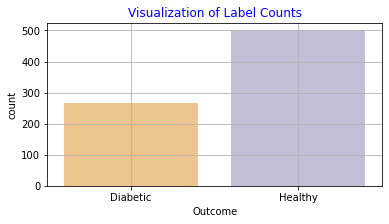

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Healthy
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Healthy
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [9]:
data=tarformat(data)
data.head()

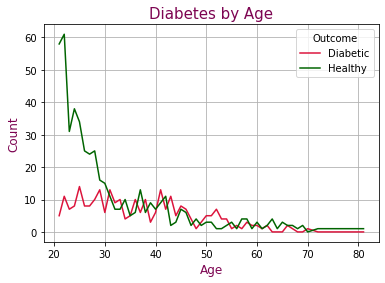

In [10]:
chartcreator(data,"Age","Outcome","line")

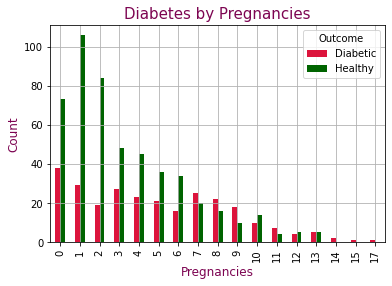

In [11]:
chartcreator(data,"Pregnancies","Outcome","bar")

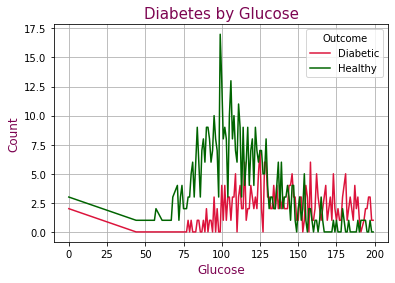

In [12]:
chartcreator(data,"Glucose","Outcome","line")

In [13]:
d1,d2=data_cat(data)

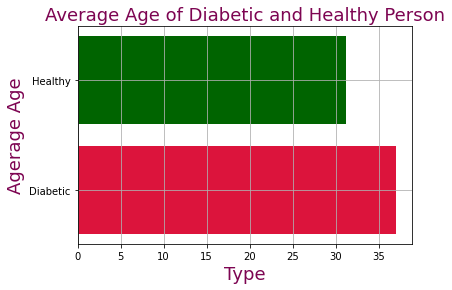

In [14]:
barchart(d1,d2,"Age")

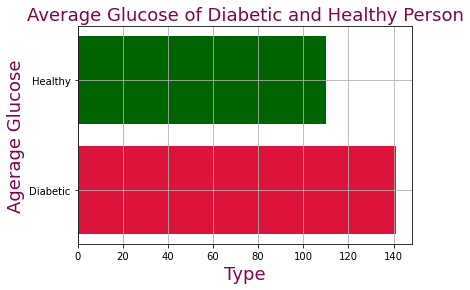

In [15]:
barchart(d1,d2,"Glucose")

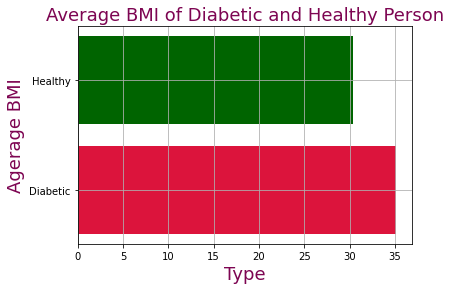

In [16]:
barchart(d1,d2,"BMI")

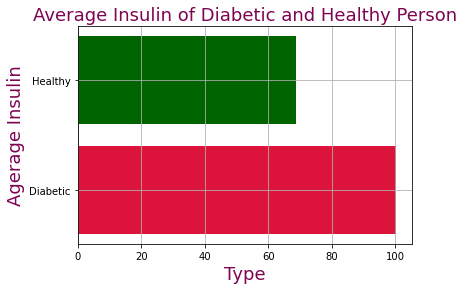

In [17]:
barchart(d1,d2,"Insulin")

## <span style='color:#2916F5'>Diabetes Detection</span>

### <span style='color:#2916F5'>Feature Selection</span>

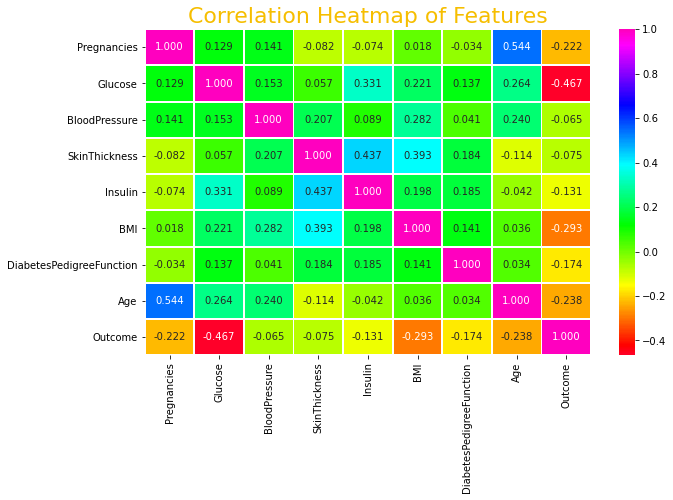

In [18]:
data1=data.copy()
data1['Outcome']=data1['Outcome'].replace(data1['Outcome'].unique(),[i+1 for i in range(len(data1['Outcome'].unique()))])
crdata=data1.corr()
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap of Features", fontsize=22,color="#F6BE00")
sns.heatmap(crdata,annot=True,cmap='gist_rainbow',fmt='.3f',linewidths=1)
plt.show()

In [19]:
selected=crdata['Outcome'].sort_values()[:-3].index.tolist()
print("Selected Features:\n",*selected, sep="\n")

Selected Features:

Glucose
BMI
Age
Pregnancies
DiabetesPedigreeFunction
Insulin


### <span style='color:#2916F5'>Initiating Predictors and Target Feature and Split the data</span>

In [20]:
X=data[selected]
y=data['Outcome']

x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.8, random_state=10)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~ Data Splitting ~~~~~~~~~~~~~~~~~~~~~~~")
print("\tSplit Ratio (Train : Test): {}% : {}%".format(round((len(x_train)/len(X))*100),round((len(x_test)/len(X))*100)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\t            Train Set: {}".format(round(len(X)*(0.8))))
print("\t            Test Set: {}".format(round(len(X)*(1-0.8))))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~ Data Splitting ~~~~~~~~~~~~~~~~~~~~~~~
	Split Ratio (Train : Test): 80% : 20%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	            Train Set: 614
	            Test Set: 154
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### <span style='color:#2916F5'>Diabetes Detection using ML</span>

In [21]:
clf_diab=[
    MLPClassifier(hidden_layer_sizes=(150,),activation='relu',solver="sgd",learning_rate="adaptive",learning_rate_init=0.0001),
    SGDClassifier(penalty="l1",max_iter=400,tol=0.01,learning_rate="adaptive",eta0=0.6),
    GaussianNB(var_smoothing=1e-07),
    DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best',min_samples_split=4,max_depth=12),
    make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=0.001)),
]

In [22]:
clf_diab_names=[
    "MLP Classifier",
    "Scholastic Gradient Descent",
    "Naive Bayes(Gaussian)",
    "Decision Tree Classifier",
    "Support Vector Classifier"
]

In [23]:
detectscores=[[],[],[],[]]
backupscvores1=[]
print("_____________________________________________________________________________")
for i in range(len(clf_diab)):
    print("                            {} ".format(clf_diab_names[i]))
    print("_____________________________________________________________________________")
    intmscr=[[],[],[],[],[],[]]
    for ts in range(10):
        clf_diab[i].fit(x_train,y_train)
        dpred=clf_diab[i].predict(x_test)
        intmscr[0].append(round(sklearn.metrics.accuracy_score(y_test,dpred)*100,4))
        intmscr[1].append(round(sklearn.metrics.precision_score(y_test, dpred, average='weighted'),4)*100)
        intmscr[2].append(round(sklearn.metrics.recall_score(y_test, dpred, average='weighted'),4)*100)
        intmscr[3].append(round(sklearn.metrics.f1_score(y_test, dpred, average='weighted'),4)*100)
        cmt=pd.crosstab(y_test, dpred, rownames=['True'], colnames=['Predicted'], margins=True)
        intmscr[4].append(cmt.iloc[:2,:2])
        intmscr[5].append(sklearn.metrics.classification_report(y_test, dpred))
    backupscvores1.append(intmscr[0])
    mxaccidx=intmscr[0].index(max(intmscr[0]))
    detectscores[0].append(intmscr[0][mxaccidx])
    detectscores[1].append(intmscr[1][mxaccidx])
    detectscores[2].append(intmscr[2][mxaccidx])
    detectscores[3].append(intmscr[3][mxaccidx])
    print("\nAccuracy: {}%\n".format(intmscr[0][mxaccidx]))
    print("\nClassification Report for {} \n\n{}".format(clf_diab_names[i],intmscr[5][mxaccidx]))
    print("\nConfusion Matrix for {} \n\n{}\n".format(clf_diab_names[i],intmscr[4][mxaccidx]))
    print("_____________________________________________________________________________")

_____________________________________________________________________________
                            MLP Classifier 
_____________________________________________________________________________

Accuracy: 68.1818%


Classification Report for MLP Classifier 

              precision    recall  f1-score   support

    Diabetic       0.65      0.37      0.47        59
     Healthy       0.69      0.87      0.77        95

    accuracy                           0.68       154
   macro avg       0.67      0.62      0.62       154
weighted avg       0.67      0.68      0.66       154


Confusion Matrix for MLP Classifier 

Predicted  Diabetic  Healthy
True                        
Diabetic         22       37
Healthy          12       83

_____________________________________________________________________________
                            Scholastic Gradient Descent 
_____________________________________________________________________________

Accuracy: 80.5195%


Classification Re

### <span style='color:#2916F5'>Performance Comparison for Normal Data</span>

In [ ]:
detect_df=pd.DataFrame({
    "Classifiers":clf_diab_names,
    "Accuracy":detectscores[0],
    "Precision":detectscores[1],
    "Recall":detectscores[2],
    "F1-Score":detectscores[3]
})

for i in detect_df.columns.tolist()[1:]:
    detect_df=detect_df.sort_values(by=i,ascending=False)
    fig = px.bar(detect_df[::-1], x=i, y="Classifiers",text=i,color=i,
                 title="Comparison of {}".format(i),height=400,width=800)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()
detect_df.to_csv("detect_df.csv")

## <span style='color:#2916F5'>Experimenting Using Resampled Data</span>

In [25]:
datares=resample(data, replace = True, n_samples = len(data)*15, random_state = 10)
print(datares.shape)

(11520, 9)


In [26]:
X1=datares[selected]
y1=datares['Outcome']

x_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1, train_size=0.8, random_state=10)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~ Data Splitting ~~~~~~~~~~~~~~~~~~~~~~~")
print("\tSplit Ratio (Train : Test): {}% : {}%".format(round((len(x_train1)/len(X1))*100),round((len(x_test1)/len(X1))*100)))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\t            Train Set: {}".format(round(len(X1)*(0.8))))
print("\t            Test Set: {}".format(round(len(X1)*(1-0.8))))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~ Data Splitting ~~~~~~~~~~~~~~~~~~~~~~~
	Split Ratio (Train : Test): 80% : 20%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	            Train Set: 9216
	            Test Set: 2304
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [27]:
detectscores1=[[],[],[],[]]
backupscvores2=[]
print("_____________________________________________________________________________")
for i in range(len(clf_diab)):
    print("                            {} ".format(clf_diab_names[i]))
    print("_____________________________________________________________________________")
    intmscr1=[[],[],[],[],[],[]]
    for ts in range(10):
        clf_diab[i].fit(x_train1,y_train1)
        md=clf_diab[i].fit(x_train1,y_train1)
        dpred2=clf_diab[i].predict(x_test1)
        intmscr1[0].append(round(sklearn.metrics.accuracy_score(y_test1,dpred2)*100,4))
        intmscr1[1].append(round(sklearn.metrics.precision_score(y_test1, dpred2, average='weighted'),4)*100)
        intmscr1[2].append(round(sklearn.metrics.recall_score(y_test1, dpred2, average='weighted'),4)*100)
        intmscr1[3].append(round(sklearn.metrics.f1_score(y_test1, dpred2, average='weighted'),4)*100)
        cmt2=pd.crosstab(y_test1, dpred2, rownames=['True'], colnames=['Predicted'], margins=True)
        intmscr1[4].append(cmt2.iloc[:2,:2])
        intmscr1[5].append(sklearn.metrics.classification_report(y_test1, dpred2))
    backupscvores2.append(intmscr1[0])
    mxaccidx=intmscr1[0].index(max(intmscr1[0]))
    detectscores1[0].append(intmscr1[0][mxaccidx])
    detectscores1[1].append(intmscr1[1][mxaccidx])
    detectscores1[2].append(intmscr1[2][mxaccidx])
    detectscores1[3].append(intmscr1[3][mxaccidx])
    print("\nAccuracy: {}%\n".format(intmscr1[0][mxaccidx]))
    print("\nClassification Report for {} \n\n{}".format(clf_diab_names[i],intmscr1[5][mxaccidx]))
    print("\nConfusion Matrix for {} \n\n{}\n".format(clf_diab_names[i],intmscr1[4][mxaccidx]))
    print("_____________________________________________________________________________")

_____________________________________________________________________________
                            MLP Classifier 
_____________________________________________________________________________

Accuracy: 71.1806%


Classification Report for MLP Classifier 

              precision    recall  f1-score   support

    Diabetic       0.63      0.48      0.54       823
     Healthy       0.74      0.84      0.79      1481

    accuracy                           0.71      2304
   macro avg       0.69      0.66      0.67      2304
weighted avg       0.70      0.71      0.70      2304


Confusion Matrix for MLP Classifier 

Predicted  Diabetic  Healthy
True                        
Diabetic        393      430
Healthy         234     1247

_____________________________________________________________________________
                            Scholastic Gradient Descent 
_____________________________________________________________________________

Accuracy: 77.1701%


Classification Re

### <span style='color:#2916F5'>Performance Comparison for Resampled Data</span>

In [28]:
detect_df2=pd.DataFrame({
    "Classifiers":clf_diab_names,
    "Accuracy":detectscores1[0],
    "Precision":detectscores1[1],
    "Recall":detectscores1[2],
    "F1-Score":detectscores1[3]
})

for i in detect_df2.columns.tolist()[1:]:
    detect_df2=detect_df2.sort_values(by=i,ascending=False)
    fig = px.bar(detect_df2[::-1], x=i, y="Classifiers",text=i,color=i,
                 title="Comparison of {} (Resampled)".format(i),height=400,width=800)
    fig.update_layout(
        font=dict(
            family="Times New Roman, Bold",
            size=20,
            color="black"
        )
    )
    fig.show()
detect_df2.to_csv("detect_df2.csv")

In [29]:
detect_df2

,Classifiers,Accuracy,Precision,Recall,F1-Score
3,Decision Tree Classifier,98.7413,98.74,98.74,98.74
4,Support Vector Classifier,78.2118,77.97,78.21,77.33
1,Scholastic Gradient Descent,77.1701,76.92,77.17,77.01
2,Naive Bayes(Gaussian),76.6493,76.15,76.65,75.94
0,MLP Classifier,71.1806,70.19,71.18,70.13
